<a href="https://colab.research.google.com/github/MohamedAziz15/ReggressorCost-Competition/blob/main/Cost_Regressor_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df = pd.read_csv('/content/Train_Batch_1.csv',sep=",",encoding="UTF-8")

df.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574


In [ ]:
df.describe()

,Frozen Area,Cost
count,17506.000000,19416.000000
mean,492.810453,519.620778
std,145.874844,157.423741
min,227.800000,265.631700
25%,440.920000,364.269500
50%,470.270000,516.776300
75%,534.290000,662.222600
max,855.220000,783.192500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19440 entries, 0 to 19439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     19440 non-null  object 
 1   Person Description             19440 non-null  object 
 2   Place Code                     19440 non-null  object 
 3   Customer Order                 19440 non-null  object 
 4   Additional Features in market  15140 non-null  object 
 5   Promotion Name                 16530 non-null  object 
 6   Store Kind                     16530 non-null  object 
 7   Store Sales                    19440 non-null  object 
 8   Store Cost                     19440 non-null  object 
 9   Product Weights Data in (KG)   19440 non-null  object 
 10  Is Recyclable?                 19440 non-null  object 
 11  Min. Yearly Income             19437 non-null  object 
 12  Store Area                     17483 non-null 

In [ ]:
df.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
       'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
df1.keys()

Index(['Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
list3 = df2.keys()
list3 = list3.to_list()
list1 = df.keys().to_list()
print(list1)
print(list2)
print(list3)

['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Product Weights Data in (KG)', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']
['ID', 'Person Description', 'Place Code', 'Customer Order', 'Additional Features in market', 'Promotion Name', 'Store Kind', 'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight', 'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost']


In [ ]:
df1.head()

,ID,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df.rename(columns=new_columns, inplace=True)
df.keys()

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Product Weights Data in (KG)',
       'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
       'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
# Rename column headers
new_columns = {'Unnamed: 0': 'ID', 'Min. Yearly Income': 'Min. Person Yearly Income'}

#  new_columns = {'Unnamed: 0': 'ID','Person%20Description': 'Person Description', 'Min. Yearly Income': 'Min. Person Yearly Income', 'Place Code':'Place Code', 'Customer Order':'Customer Order',
#         'Additional Features in market':'Additional Features in market', 'Promotion Name':'Promotion Name', 'Store Kind':'Store Kind',
#         'Store Sales':'Store Sales', 'Store Cost':'Store Cost', 'Product Weights Data in (KG)':'Product Weights Data in (KG)',
#         'Is Recyclable?':'Is Recyclable?', 'Min. Yearly Income', 'Store Area', 'Grocery Area',
#        'Frozen Area', 'Meat Area', 'Cost'}

df1.rename(columns=new_columns, inplace=True)
df1.keys()

list2=df1.keys().to_list()

In [ ]:
new_columns_df2 = {'Unnamed: 0' : 'ID', 'Person%20Description' : 'Person Description', 'Place%20Code':'Place Code',
       'Customer%20Order':'Customer Order', 'Additional%20Features%20in%20market':'Additional Features in market',
       'Promotion%20Name':'Promotion Name', 'Store%20Kind':'Store Kind', 'Store%20Sales':'Store Sales', 'Store%20Cost':'Store Cost',
       'Gross%20Weight':'Gross Weight', 'Net%20Weight':'Net Weight', 'Is%20Recyclable?':'Is Recyclable?',
       'Yearly%20Income':'Min. Person Yearly Income', 'Store%20Area':'Store Area', 'Grocery%20Area':'Grocery Area', 'Frozen%20Area':'Frozen Area',
       'Meat%20Area':'Meat Area', 'Cost':'Cost'}
df2.rename(columns=new_columns_df2, inplace=True)
df2.keys()

# #df1
#        'Unnamed: 0', 'Person Description', 'Place Code', 'Customer Order',
#        'Additional Features in market', 'Promotion Name', 'Store Kind',
#        'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
#        'Is Recyclable?', 'Min. Person Yearly Income', 'Store Area',
#        'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'

Index(['ID', 'Person Description', 'Place Code', 'Customer Order',
       'Additional Features in market', 'Promotion Name', 'Store Kind',
       'Store Sales', 'Store Cost', 'Gross Weight', 'Net Weight',
       'Weights%20Data', 'Is Recyclable?', 'Min. Person Yearly Income',
       'Store Area', 'Grocery Area', 'Frozen Area', 'Meat Area', 'Cost'],
      dtype='object')

In [ ]:
common_columns = list(set(df.columns) & set(df1.columns) & set(df2.columns))
batch1_common = df[common_columns]
batch2_common = df1[common_columns]
batch3_common = df2[common_columns]
concatenated_df = pd.concat([batch1_common, batch2_common, batch3_common], ignore_index=True)


In [ ]:
common_key = 'ID'  # Replace with the actual key column name
merged_df = df.merge(df1, on=common_key, how='outer').merge(df2, on=common_key, how='outer')


In [ ]:
df2['Weights%20Data'][0]

"{'Gross Weight': 23.2575, 'Net Weight': 20.3503, 'Package Weight': 2.9072}"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df1 = pd.read_csv('/content/Train_Batch_2.csv',sep=",",encoding="UTF-8")

df1.head()


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
df1.describe()

,Gross Weight,Net Weight,Store Area,Grocery Area,Meat Area,Cost
count,11014.000000,11018.000000,11663.000000,11658.000000,11688.000000,12953.000000
mean,20.032870,17.149701,2598.170053,1773.400262,329.709677,518.565349
std,6.700986,6.804349,524.954453,365.488893,96.819335,155.198098
min,8.721600,4.433500,1882.710000,1233.080000,149.900000,265.631700
25%,14.045325,11.207200,2189.080000,1506.990000,293.577500,364.269500
50%,19.768900,16.861700,2572.860000,1734.500000,313.550000,515.259600
75%,25.728600,23.257500,2864.085000,2052.540000,394.272500,660.235200
max,31.833700,30.234700,3692.840000,2822.650000,570.740000,783.192500


In [ ]:
df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650


In [ ]:
df['Person Description'][2]

'Married Male with two children, education: high school degree working as skilled manual'

In [ ]:
df['Promotion Name'][2]

'Shelf Emptiers'

In [ ]:
df2.describe()

,Gross%20Weight,Net%20Weight,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
count,5491.000000,5511.000000,6151.000000,6138.000000,6147.000000,6133.000000,6462.000000
mean,20.153632,17.152036,2602.487761,1779.720722,493.928194,328.839786,519.355948
std,6.683436,6.744036,532.761319,367.559597,147.995833,97.616394,158.578508
min,8.721600,4.491600,1882.710000,1233.240000,227.800000,149.900000,265.631700
25%,14.223400,11.294400,2190.910000,1508.000000,440.920000,293.120000,364.164900
50%,19.914200,16.861700,2572.860000,1734.500000,470.270000,313.550000,516.776300
75%,26.019300,22.966800,2863.465000,2052.550000,534.290000,356.190000,662.222600
max,31.833700,30.234700,7857.550000,2822.610000,1783.640000,570.730000,783.192500


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

df2 = pd.read_csv('/content/Train_Batch_3.csv',sep=",",encoding="UTF-8")

df2.head()


,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411
2,mc_ID_2,"Married Male with three children, education: h...",T02ma_WA,"Paper Products from Household department, Orde...","['Coffee Bar', 'Bar For Salad', 'Ready Food', ...",Promo Big,Deluxe,4.98 Millions,2.4402 Millions,10.5531,7.6459,"{'Gross Weight': 10.5531, 'Net Weight': 7.6459...",no,30K+,3140.99,2055.29,654.13,436.09,267.3576
3,mc_ID_3,"Married Female with five children, education: ...",H11go_ZA,"Snack Foods from Snack Foods department, Order...","['Video Store', 'Coffee Bar', 'Ready Food', 'F...",Price Destroyers,NaN,5.24 Millions,2.0436 Millions,23.6936,NaN,"{'Gross Weight': 23.6936, 'Net Weight': 20.641...",no,10K+,2841.35,2038.11,481.98,322.22,777.2826
4,mc_ID_4,"Married Female with No children, education: pa...",O09ba_VE,"Canned Soup from Canned Foods department, Orde...","['Ready Food', 'Bar For Salad']",Save Price,Supermarket,8.84 Millions,3.4476 Millions,13.6056,10.6839,"{'Gross Weight': 13.6056, 'Net Weight': 10.683...",no,110K+,3236.33,2448.37,472.27,313.87,406.4756


In [ ]:
df2['Additional%20Features%20in%20market'][0]

"['Coffee Bar', 'Florist', 'Ready Food', 'Bar For Salad']"

In [ ]:
df1['Additional Features in market'][0]

"['Video Store', 'Florist', 'Ready Food', 'Bar For Salad', 'Coffee Bar']"

In [ ]:
df1.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,12.3555,no,30K+,2811.99,2049.72,457.36,304.91,557.8318
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,NaN,yes,10K+,2147.17,NaN,373.1,248.79,642.0871
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,16.4256,no,50K+,3685.30,2265.90,853.22,568.75,432.0503


In [ ]:
import pandas as pd

# Concatenate the DataFrames vertically (along rows)
concatenated_df = pd.concat([df1, df2, df], ignore_index=True)

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('/content/concatenated.csv', index=False)



In [ ]:
concatenated_df.head()

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mc_ID_2,"Married Female with three children, education:...",S04ne_WA,"Frozen Desserts from Frozen Foods department, ...",[],Tip Top Savings,Supermarket,8.4 M,3.192 M,16.7163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mc_ID_3,"Single Male with four children, education: par...",V13er_BC,"Frozen Desserts from Frozen Foods department, ...","['Coffee Bar', 'Ready Food', 'Bar For Salad', ...",Price Cutters,NaN,4.6 M,1.518 M,24.1296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mc_ID_4,"Married Female with four children, education: ...",B14on_WA,"Meat from Deli department, Ordered Brand : Moms","['Ready Food', 'Bar For Salad']",Money Savers,Supermarket,6.81 M,3.2007 M,17.8792,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head(10)


,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Product Weights Data in (KG),Is Recyclable?,Min. Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Female with four children, education: b...",H11go_ZA,"Cleaning Supplies from Household department, O...","['Video Store', 'Florist', 'Ready Food', 'Coff...",Dimes Off,Deluxe,8.76 Millions,4.2924 Millions,"{'Gross Weight': 28.1997, 'Net Weight': 26.600...",recyclable,10K+,2842.23,2037.64,481.98,323,602.7575
1,mc_ID_1,"Single Female with three children, education: ...",S04ne_WA,"Snack Foods from Snack Foods department, Order...",NaN,Budget Bargains,Supermarket,6.36 Millions,1.9716 Millions,"{'Gross Weight': 16.571, 'Net Weight': 14.972,...",non recyclable,50K+,2814.95,2049.72,457.36,NaN,708.6650
2,mc_ID_2,"Married Male with two children, education: hig...",L05es_CA,"Magazines from Periodicals department, Ordered...",['Florist'],Shelf Emptiers,Supermarket,10.86 Millions,4.4526 Millions,"{'Gross Weight': 28.6358, 'Net Weight': 27.182...",recyclable,30K+,2192.32,1322.21,523.32,348.85,564.2647
3,mc_ID_3,"Single Female with three children, education: ...",S03le_WA,"Dairy from Dairy department, Ordered Brand : C...",['Coffee Bar'],Savings Galore,NaN,1.98 Millions,0.6732 Millions,"{'Gross Weight': 14.2161, 'Net Weight': 11.294...",recyclable,30K+,1974.73,NaN,440.92,293.95,724.5119
4,mc_ID_4,"Married Female with five children, education: ...",M10da_YU,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Ready Food', 'Coffee Bar', ...",Sale Winners,Deluxe,11.56 Millions,4.9708 Millions,"{'Gross Weight': 12.6172, 'Net Weight': 9.71, ...",non recyclable,50K+,2862.3,1872.19,593.93,395.95,519.7574
5,mc_ID_5,"Single Male with four children, education: hig...",S03le_WA,"Candles from Household department, Ordered Bra...",['Coffee Bar'],Weekend Discount,Supermarket,5.22 Millions,1.6182 Millions,"{'Gross Weight': 15.4081, 'Net Weight': 13.954...",recyclable,30K+,1970.17,1236.07,440.92,293.95,364.1649
6,mc_ID_6,"Married Female with five children, education: ...",S04ne_WA,Pain Relievers from Health and Hygiene departm...,NaN,Price Winners,NaN,8.49 Millions,3.7356 Millions,"{'Gross Weight': 17.1524, 'Net Weight': 14.245...",recyclable,130K+,2814.82,2049.72,457.36,304.91,599.3580
7,mc_ID_7,"Married Male with four children, education: pa...",A17co_GU,"Vegetables from Frozen Foods department, Order...",NaN,Shelf Clearing Days,Supermarket,6.57 Millions,2.6937 Millions,"{'Gross Weight': 17.2978, 'Net Weight': 14.376...",recyclable,10K+,NaN,1623.48,341.05,NaN,288.8006
8,mc_ID_8,"Married Male with five children, education: hi...",O09ba_VE,Beer and Wine from Alcoholic Beverages departm...,"['Bar For Salad', 'Ready Food']",Big Time Discounts,Supermarket,2.43 Millions,1.1907 Millions,"{'Gross Weight': 25.1472, 'Net Weight': 23.548...",recyclable,30K+,3236.46,2449.91,472.27,313.55,501.9754
9,mc_ID_9,"Single Male with one child, education: high sc...",S01em_OR,"Vegetables from Produce department, Ordered Br...","['Bar For Salad', 'Video Store', 'Ready Food',...",Lottery Cash Registerion,Deluxe,4.02 Millions,1.2864 Millions,"{'Gross Weight': 14.972, 'Net Weight': 12.0648...",non recyclable,30K+,2572.49,1734.5,503.07,333.55,290.7357


In [ ]:
df1.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,Net Weight,Is Recyclable?,Min. Person Yearly Income,Store Area,Grocery Area,Frozen Area,Meat Area,Cost
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,19.0421,yes,30K+,2577.50,1734.50,503.07,335.38,287.1270
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,16.1349,yes,30K+,3145.51,2057.74,654.13,NaN,779.6884


In [ ]:
df2.head(2)

,Unnamed: 0,Person%20Description,Place%20Code,Customer%20Order,Additional%20Features%20in%20market,Promotion%20Name,Store%20Kind,Store%20Sales,Store%20Cost,Gross%20Weight,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Cost
0,mc_ID_0,"Single Female with two children, education: pa...",T02ma_WA,"Meat from Deli department, Ordered Brand : Red...","['Coffee Bar', 'Florist', 'Ready Food', 'Bar F...",Sale : Double Down,Deluxe,7.12 Millions,2.5632 Millions,23.2575,20.3503,"{'Gross Weight': 23.2575, 'Net Weight': 20.350...",yes,90K+,3145.51,2056.79,654.13,436.09,500.7202
1,mc_ID_1,"Single Female with five children, education: p...",M10da_YU,"Specialty from Produce department, Ordered Bra...","['Coffee Bar', 'Florist', 'Bar For Salad', 'Vi...",GLD,Deluxe,14.72 Millions,7.0656 Millions,16.7163,12.3555,"{'Gross Weight': 16.7163, 'Net Weight': 12.355...",yes,30K+,2856.68,1871.16,595.93,395.51,484.1411


In [ ]:
concatenated_df.head(2)

,Unnamed: 0,Person Description,Place Code,Customer Order,Additional Features in market,Promotion Name,Store Kind,Store Sales,Store Cost,Gross Weight,...,Net%20Weight,Weights%20Data,Is%20Recyclable?,Yearly%20Income,Store%20Area,Grocery%20Area,Frozen%20Area,Meat%20Area,Product Weights Data in (KG),Min. Yearly Income
0,mc_ID_0,"Single Male with two children, education: high...",S01em_OR,"Baking Goods from Baking Goods department, Ord...","['Video Store', 'Florist', 'Ready Food', 'Bar ...",Tip Top Savings,Deluxe,3.28 M,0.984 M,21.9493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mc_ID_1,"Married Male with four children, education: hi...",T02ma_WA,"Canned Sardines from Canned Foods department, ...","['Florist', 'Bar For Salad', 'Ready Food', 'Co...",Discount Frenzy,Deluxe,9.35 M,4.2075 M,19.1874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Promotion Name'].value_counts()

Save Price                  676
Weekend Discount            660
Two Day Sale                633
Price Winners               579
Super Savers                568
Save It (Sale)              541
One Day Sale                519
Super Duper Savers          508
Roller Savings (High)       497
GLD                         478
Price Slashers              476
Full Free                   463
Shelf Clearing Days         459
Sale : Double Down          457
Lottery Cash Registerion    418
Two for One                 407
Big Time Discounts          400
Go For It                   394
Money Savers                379
Price Destroyers            369
Budget Bargains             360
Saving Days                 351
Discount Frenzy             332
Best Price Savers           327
Price Cutters               323
Dimes Off                   301
Savings Galore              298
Bag Stuffer                 287
Promo Big                   285
You Save Days               283
Sales Days                  279
I Cant B

In [ ]:
df['Store Kind'].value_counts()

Supermarket      7209
Deluxe           6220
Gourmet          1821
Mid-Size          761
Small Grocery     519
Name: Store Kind, dtype: int64

In [ ]:
df['Store Sales'].value_counts()

5.04 Millions     99
4.8 Millions      91
5.4 Millions      90
8.52 Millions     89
7.95 Millions     86
                  ..
18.8 Millions      1
1.61 Millions      1
3.21 Millions      1
16.35 Millions     1
19.05 Millions     1
Name: Store Sales, Length: 945, dtype: int64

In [ ]:
df['Gross Weight'][0]

KeyError: ignored

In [ ]:
df['Net Weight'].value_counts()

KeyError: ignored

In [ ]:
df['Package Weight'].value_counts

KeyError: ignored

In [ ]:
from google.colab import data_table
data_table.DataTable(df, include_index=False, num_rows_per_page=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Review

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# getting the dataset's rows and columns by invoking the shape() function
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


# Data Preprocessing and Cleaning

In [ ]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
df.duplicated().sum()

0

--> *no dublicates Found*


In [ ]:
df= df.drop ('CustomerID',axis=1)

In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
X_scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

# Feature Engineering

> Feature Polynomial

> One-hot encoding (Gender)




<ipython-input-7-1ce0e26227fe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

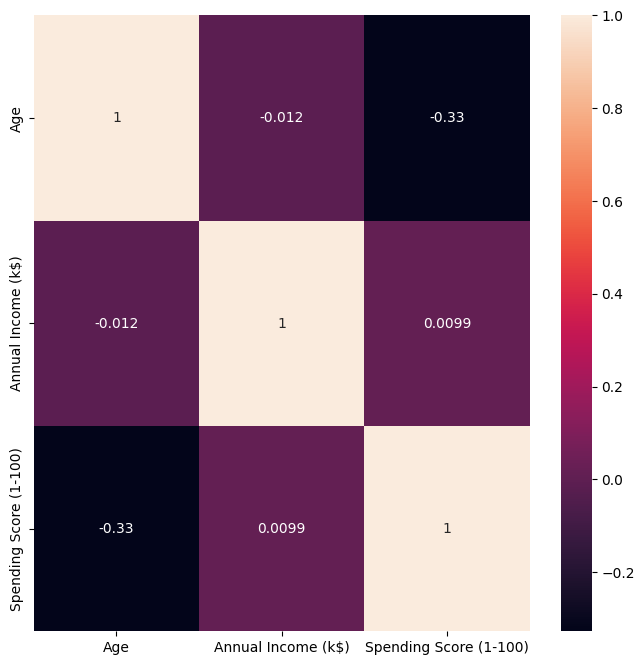

In [ ]:
plt.subplots(figsize = (8, 8))
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["Gender"] = df["Gender"].replace(["Female","Male"],[0,1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Gender                  200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


scaler

Normalization

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
x_train, x_test = train_test_split(df,test_size=0.2,random_state=42)


In [ ]:
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26
24,0,54,28,14
122,0,40,69,58


In [ ]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
centroids = kmeans.cluster_centers_
centroids

array([[ 0.35      , 44.65      , 26.55      , 20.65      ],
       [ 0.41269841, 44.28571429, 56.42857143, 49.        ],
       [ 0.47058824, 32.94117647, 87.82352941, 82.97058824],
       [ 0.52173913, 39.65217391, 91.2173913 , 16.17391304],
       [ 0.4       , 25.55      , 26.35      , 79.55      ]])

In [ ]:
# plt.scatter(x_train['Gender'],x_train['Age'],x_train['Annual Income (k$)'],x_train['Spending Score (1-100)'], s =50, c='b')
# plt.scatter( 0.41836735, 44.64285714, 58.36734694, 34.8877551, s=200, c='g', marker='s')
# plt.scatter(  0.4516129 , 29.85483871, 64.14516129, 78.46774194, s=200, c='r', marker='s')
# plt.show()

In [ ]:
y_=kmeans.labels_
y_

array([1, 2, 0, 0, 1, 2, 4, 4, 2, 1, 1, 2, 4, 1, 1, 1, 3, 1, 3, 1, 2, 1,
       4, 0, 4, 1, 0, 2, 1, 3, 1, 2, 3, 4, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2,
       2, 1, 2, 0, 3, 1, 0, 2, 1, 4, 4, 3, 2, 0, 4, 1, 0, 0, 1, 2, 1, 3,
       0, 1, 1, 1, 3, 0, 3, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 3, 4, 4, 3, 2,
       1, 4, 3, 1, 1, 3, 4, 3, 4, 1, 1, 2, 3, 3, 2, 1, 1, 0, 4, 1, 1, 1,
       3, 2, 1, 0, 4, 1, 2, 2, 4, 1, 2, 3, 2, 2, 1, 1, 1, 1, 3, 1, 1, 1,
       4, 1, 3, 3, 2, 4, 2, 2, 4, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 0, 3,
       1, 1, 0, 1, 2, 1], dtype=int32)

In [ ]:
kmeans.predict(x_test)

array([1, 4, 0, 3, 3, 1, 1, 3, 3, 4, 1, 3, 2, 1, 3, 2, 1, 3, 1, 1, 3, 0,
       3, 1, 1, 1, 1, 1, 2, 1, 4, 0, 1, 1, 3, 1, 2, 2, 3, 1], dtype=int32)

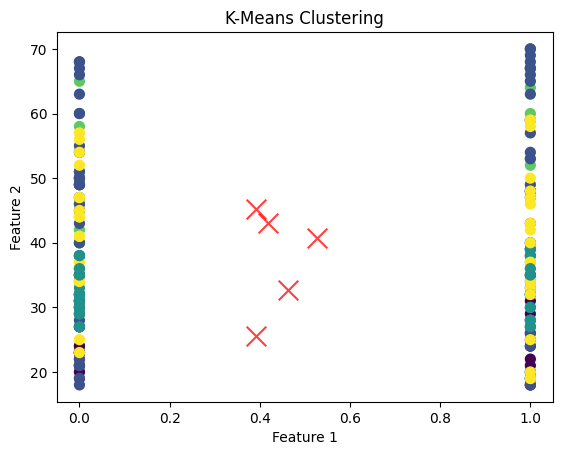

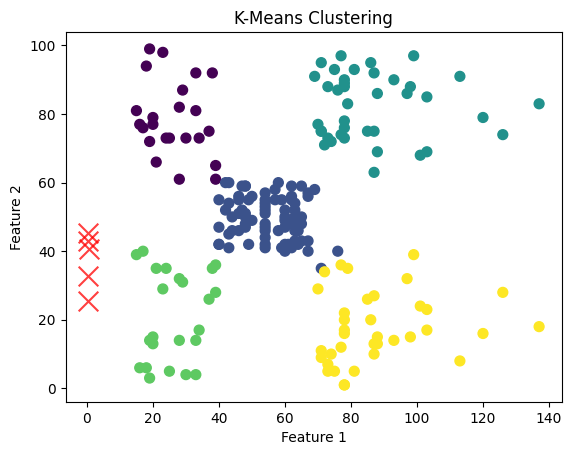

In [ ]:
# Apply K-Means clustering
kmeans1 = KMeans(n_clusters=5,n_init = 10 ,max_iter=300)
kmeans1.fit(df)
y_kmeans = kmeans1.predict(df)

# Plot the data and cluster centers
plt.scatter(df['Gender'],df['Age'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Plot the data and cluster centers
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=y_kmeans, cmap='viridis', s=50)
centers = kmeans1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()



In [ ]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Finding closest centroids


In [ ]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    Args:
        X (ndarray): (m, n) Input values
        centroids (ndarray): (K, n) centroids
    Returns:
        idx (array_like): (m,) closest centroids    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

    ### START CODE HERE ###
    for i in range(X.shape[0]):

        distances =[]

        for j in range(centroids.shape[0]):

            norm_ij = np.linalg.norm(X.iloc[i]- centroids[j])
           # print('norm ',i,' ', j,' :', norm_ij)
            distances.append(norm_ij)
           # print('distances inner loop: ',distances)

        idx[i] = np.argmin(distances)

  #  print('distances outer loop: ',distances)

   # print('idx :', idx)

     ### END CODE HERE ###

    return idx

In [ ]:
df.shape[0]

200

In [ ]:
# Find closest centroids using initial_centroids
idx = find_closest_centroids(df, centers)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

First three elements in idx are: [3 0 3]


In [ ]:
idx

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

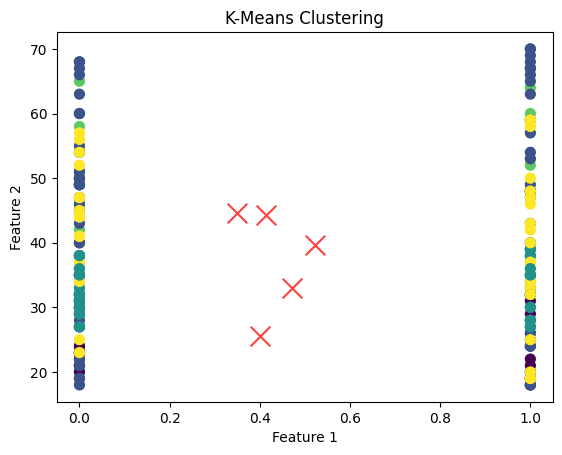

In [ ]:
# Plot the data points with cluster labels
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=idx, cmap='viridis', s=50)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

## Computing centroid means


In [ ]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the
    data points assigned to each centroid.
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each
                       example in X. Concretely, idx[i] contains the index of
                       the centroid closest to example i
        K (int):       number of centroids
    Returns:
        centroids (ndarray): (K, n) New centroids computed """

    # Useful variables
    m, n = X.shape

    # You need to return the following variables correctly
    centroids = np.zeros((K, n))

#     1. Gather all training examples which have same centroid
#     2. Compute Mean of each Centroid

    for i in range(K):
        points = X[idx == i]
        centroids[i] = np.mean(points,axis=0)

    return centroids

In [ ]:
K = 5
centroids = compute_centroids(df, idx, K)

print("The centroids are:", centroids)


The centroids are: [[ 0.39130435 25.52173913 26.30434783 78.56521739]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.52777778 40.66666667 87.75       17.58333333]]


In [ ]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """

    # # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    # previous_centroids = centroids
    idx = np.zeros(m)
    # plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):

        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))

        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        # # Optionally plot progress
        # if plot_progress:
        #     plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
        #     previous_centroids = centroids

        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    print('centroids',centroids)
    plt.show()
    return centroids, idx

In [ ]:
centroidss, idx= run_kMeans(df,centers)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9
centroids [[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.41772152 43.08860759 55.29113924 49.56962025]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.52777778 40.66666667 87.75       17.58333333]
 [ 0.39130435 25.52173913 26.30434783 78.56521739]]


In [ ]:
centroidss

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

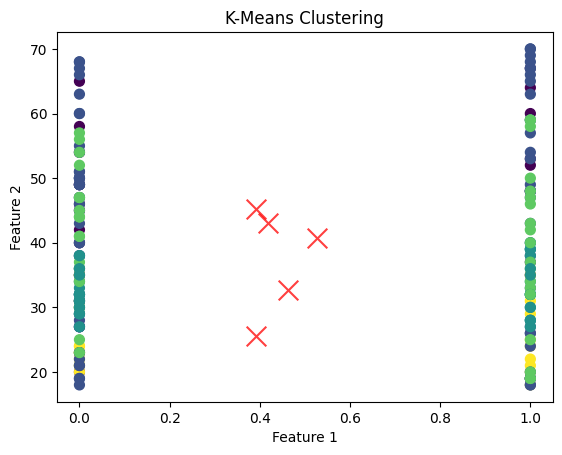

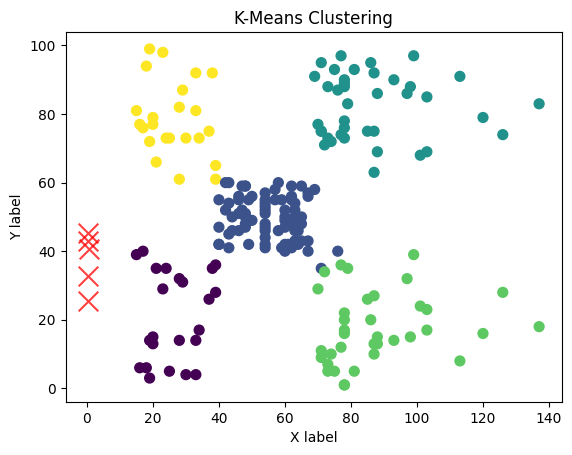

In [ ]:
# Apply K-Means clustering
kmeans1 = KMeans(n_clusters=5,n_init = 10 ,max_iter=300)
kmeans1.fit(df)
y_kmeans = kmeans1.predict(df)

# Plot the data and cluster centers
plt.scatter(df['Gender'],df['Age'], c=idx, cmap='viridis', s=50)
# centers = kmeans1.cluster_centers_
plt.scatter(centroidss[:, 0], centroidss[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

# Plot the data and cluster centers
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'], c=idx, cmap='viridis', s=50)
plt.scatter(centroidss[:, 0], centroidss[:, 1], c='red', marker='x', s=200, alpha=0.75)
plt.xlabel('X label')
plt.ylabel('Y label')
plt.title('K-Means Clustering')
plt.show()


# 3D Plotting

In [ ]:
#3D plotting

import plotly.graph_objs as go
import plotly as py

df['label3'] =  idx
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)